<a href="https://colab.research.google.com/github/quarcs-lab/pysal-tutorials/blob/master/giddy_space_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space-time visualisations (giddy)

## Install libraries

In [0]:
!pip install -q geopandas
!pip install -q libpysal
!pip install -q mapclassify
!pip install -q splot
!pip install -q legendgram
!pip install -q esda
!pip install -q inequality
!pip install -q giddy
!pip install -q ipywidgets 

## Load libraries

In [0]:
from libpysal.weights.contiguity import Queen
from libpysal import examples
import geopandas as gpd
import pandas as pd
import numpy as np
from giddy.directional import Rose
import matplotlib.pyplot as plt
import esda
from splot.esda import lisa_cluster

from ipywidgets import interact, fixed
import ipywidgets as widgets

%matplotlib inline
plt.style.use('ggplot')

## Data prepration

In [0]:
# get csv and shp and merge
shp_link = examples.get_path('us48.shp')
df = gpd.read_file(shp_link)
income_table = pd.read_csv(examples.get_path("usjoin.csv"))

In [0]:
# calculate relative values
for year in range(1969, 2010):
    income_table[str(year) + '_rel'] = income_table[str(year)] / income_table[str(year)].mean()

In [0]:
# merge
gdf = df.merge(income_table,left_on='STATE_NAME',right_on='Name')

In [0]:
#retrieve spatial weights and data for two points in time
w = Queen.from_dataframe(gdf)
w.transform = 'r'
y1 = gdf['1969_rel'].values
y2 = gdf['2000_rel'].values

In [0]:
# create rose object
Y = np.array([y1, y2]).T
rose = Rose(Y, w, k=5)

In [0]:
# calculate Moran_Local
moran_loc1 = esda.moran.Moran_Local(y1, w)
moran_loc2 = esda.moran.Moran_Local(y2, w)

## Plotting

In [0]:
from splot.giddy import (dynamic_lisa_heatmap,
                         dynamic_lisa_rose,
                         dynamic_lisa_vectors,
                         dynamic_lisa_composite,
                         dynamic_lisa_composite_explore)
import splot

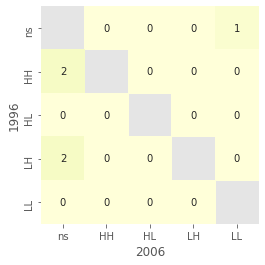

In [12]:
fig, ax = dynamic_lisa_heatmap(rose)
ax.set_ylabel(1996)
ax.set_xlabel(2006)
plt.show()

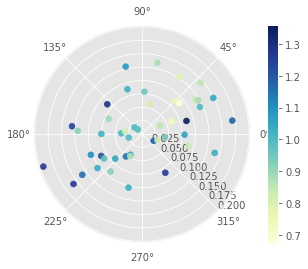

In [13]:
fig, ax = dynamic_lisa_rose(rose, attribute=y1)
plt.show()

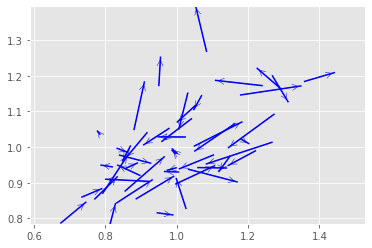

In [14]:
fig, ax = dynamic_lisa_vectors(rose)

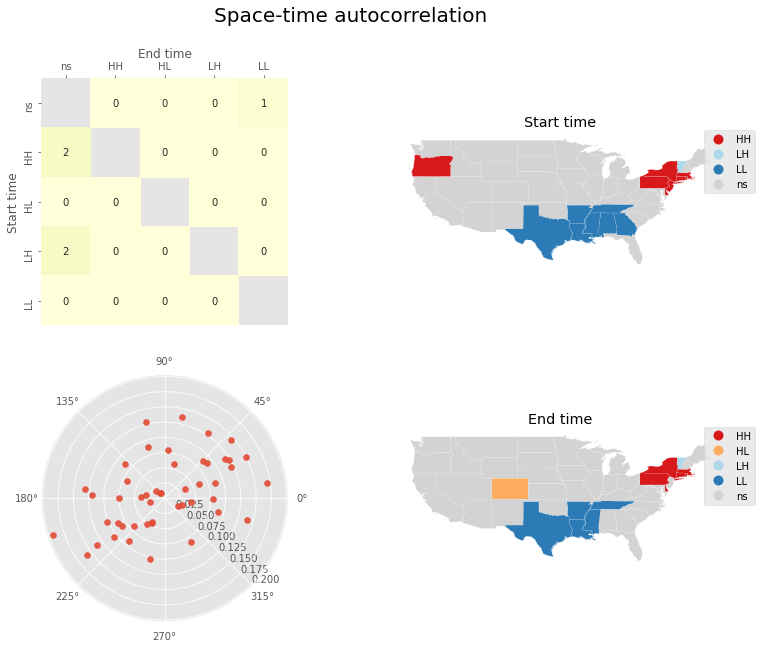

In [15]:
dynamic_lisa_composite(rose, gdf)
plt.show()

In [16]:
dynamic_lisa_composite_explore(rose, gdf, pattern='rel')
plt.show()

interactive(children=(Dropdown(description='start_time', options={'1969_rel': '1969_rel', '1970_rel': '1970_re…